Data Source : https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

In [1]:
import pandas as pd

  
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
    
print(df.head(5))


                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = df["headline"] # Creating a list of headlines
labels = df["is_sarcastic"]

In [3]:
#Buliding Classifier
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

#To split the data into training and test set we use the following commands
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [4]:
#Tokenizing and padding the dataset
tokenizer = Tokenizer(num_words = vocab_size,oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen = max_length,truncating = trunc_type,padding = padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length,truncating = trunc_type,padding = padding_type)

In [5]:
import tensorflow as tf
#Defining the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),#key to text sentimental analysis in tensorflow
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation ='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss ='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Training the model
num_epochs = 40
history =model.fit(training_padded, training_labels, epochs = num_epochs, validation_data =(testing_padded, testing_labels),verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/40
20000/20000 - 3s - loss: 0.5510 - accuracy: 0.7189 - val_loss: 0.3895 - val_accuracy: 0.8348
Epoch 2/40
20000/20000 - 2s - loss: 0.3052 - accuracy: 0.8763 - val_loss: 0.3428 - val_accuracy: 0.8559
Epoch 3/40
20000/20000 - 2s - loss: 0.2274 - accuracy: 0.9125 - val_loss: 0.3507 - val_accuracy: 0.8495
Epoch 4/40
20000/20000 - 2s - loss: 0.1835 - accuracy: 0.9308 - val_loss: 0.3655 - val_accuracy: 0.8520
Epoch 5/40
20000/20000 - 3s - loss: 0.1511 - accuracy: 0.9449 - val_loss: 0.3967 - val_accuracy: 0.8504
Epoch 6/40
20000/20000 - 3s - loss: 0.1282 - accuracy: 0.9545 - val_loss: 0.4371 - val_accuracy: 0.8445
Epoch 7/40
20000/20000 - 3s - loss: 0.1091 - accuracy: 0.9625 - val_loss: 0.4766 - val_accuracy: 0.8413
Epoch 8/40
20000/20000 - 2s - loss: 0.0944 - accuracy: 0.9685 - val_loss: 0.5197 - val_accuracy: 0.8365
Epoch 9/40
20000/20000 - 3s - loss: 0.0803 - accuracy: 0.9744 - val_loss: 0.5736 - val_accuracy: 0.8325
Epoch 10/40
200

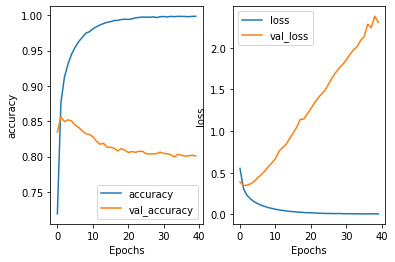

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
plt.subplot(1, 2, 1)   
plot_graphs(history,"accuracy")
plt.subplot(1, 2, 2) 
plot_graphs(history,"loss")

The accuracy increased but the validation loss increased alot. By changing the parameters we need to identify the optimal hyperparmeters